## Dataset Details

- **Name**: 30000 Spotify Songs
- **Source**: Kaggle, JOAKIM ARVIDSSON
- **URL**: [Kaggle Dataset]https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data
- **License**: Its license type is Database: Open Database, Contents: Database Contents, the Licensor grants to us a worldwide, royalty-free, non-exclusive, perpetual, irrevocable copyright license to do any act that is restricted by copyright over anything within the Contents, whether in the original medium or any other. We can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. https://opendatacommons.org/licenses/dbcl/1-0/
- **Size**: The dataset spotify_songs.csv has a size of approximately 27.98 MB and contains 32,833 items (rows).

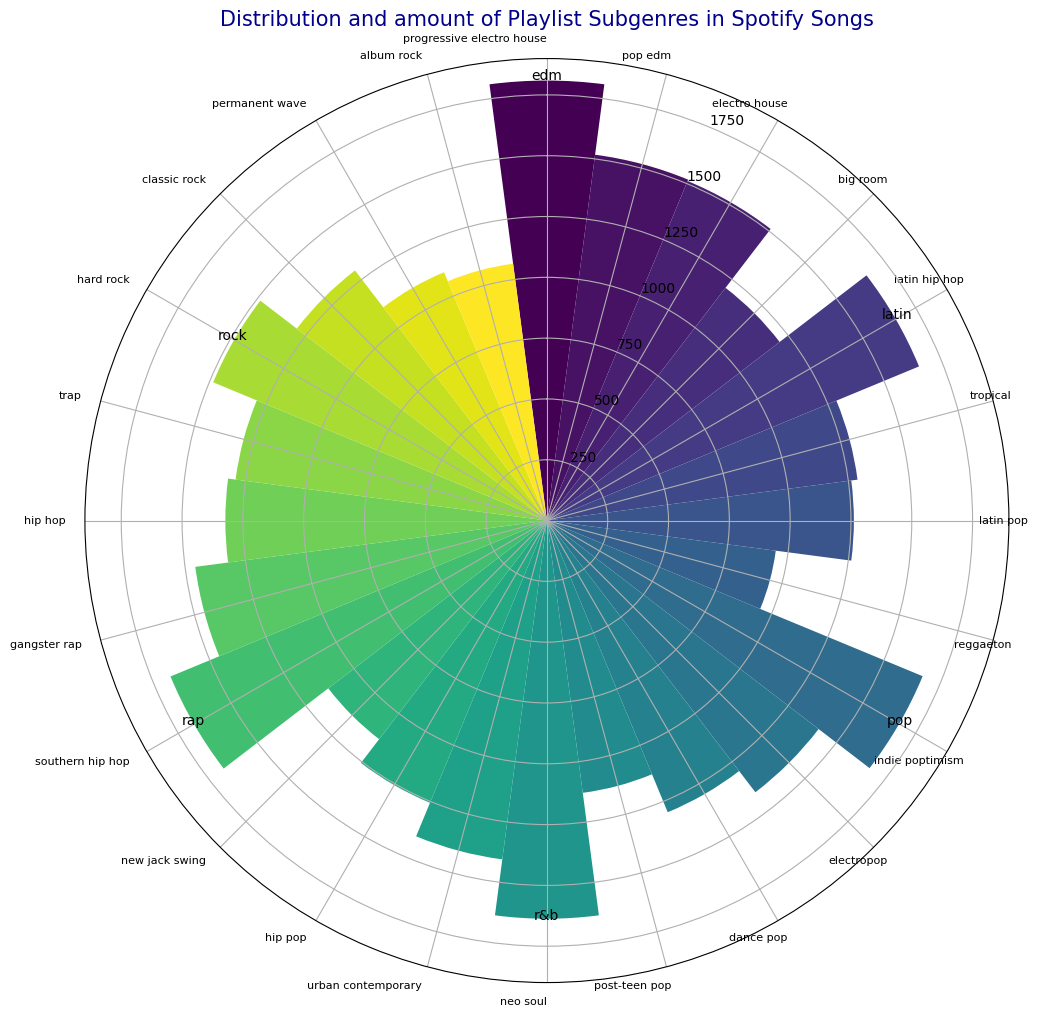

In [12]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('spotify_songs.csv')

genre_subgenre_grouped = df.groupby(['playlist_genre', 'playlist_subgenre']).size().reset_index(name='count')
genre_subgenre_grouped.sort_values(by=['playlist_genre', 'count'], ascending=[True, False], inplace=True)

ordered_subgenres = genre_subgenre_grouped['playlist_subgenre']
ordered_counts = genre_subgenre_grouped['count']
genres = genre_subgenre_grouped['playlist_genre']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
theta = np.linspace(0.0, 2 * np.pi, len(ordered_subgenres), endpoint=False)
width = 2 * np.pi / len(ordered_subgenres)

colors = plt.cm.viridis(np.linspace(0, 1, len(ordered_subgenres)))

bars = ax.bar(theta, ordered_counts, width=width, bottom=0.0, color=colors)

for i, (genre, count) in enumerate(zip(genres, ordered_counts)):
    if i == 0 or genre != genres.iloc[i-1]:
        ax.text(theta[i], count + 5, genre, horizontalalignment='center', size=10, color='black')
ax.set_title('Distribution and amount of Playlist Subgenres in Spotify Songs', fontsize=15, color='darkblue')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks(theta)
ax.set_xticklabels(ordered_subgenres, fontsize=8, rotation=45, ha="right")

plt.show()


In [16]:
# Heatmap of Track Artist vs. Track Popularity

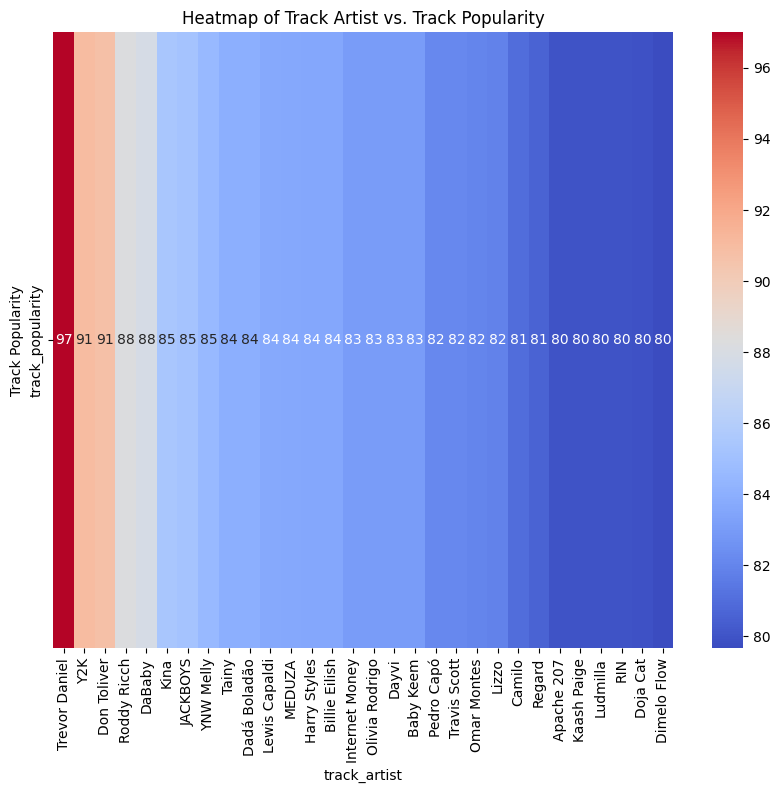

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify_songs.csv')

grouped_data = df.groupby('track_artist')['track_popularity'].mean().reset_index()

sorted_data = grouped_data.sort_values(by='track_popularity', ascending=False)

top_artists = sorted_data.head(30)


plt.figure(figsize=(10, 8))
sns.heatmap(top_artists.set_index('track_artist').T, cmap='coolwarm', annot=True)
plt.title('Heatmap of Track Artist vs. Track Popularity')
plt.ylabel('Track Popularity')
plt.show()

# Percentage of Tracks in Minor vs Major for Each Sub-Genre along with Artists that Mostly leveraging Minor vs Major

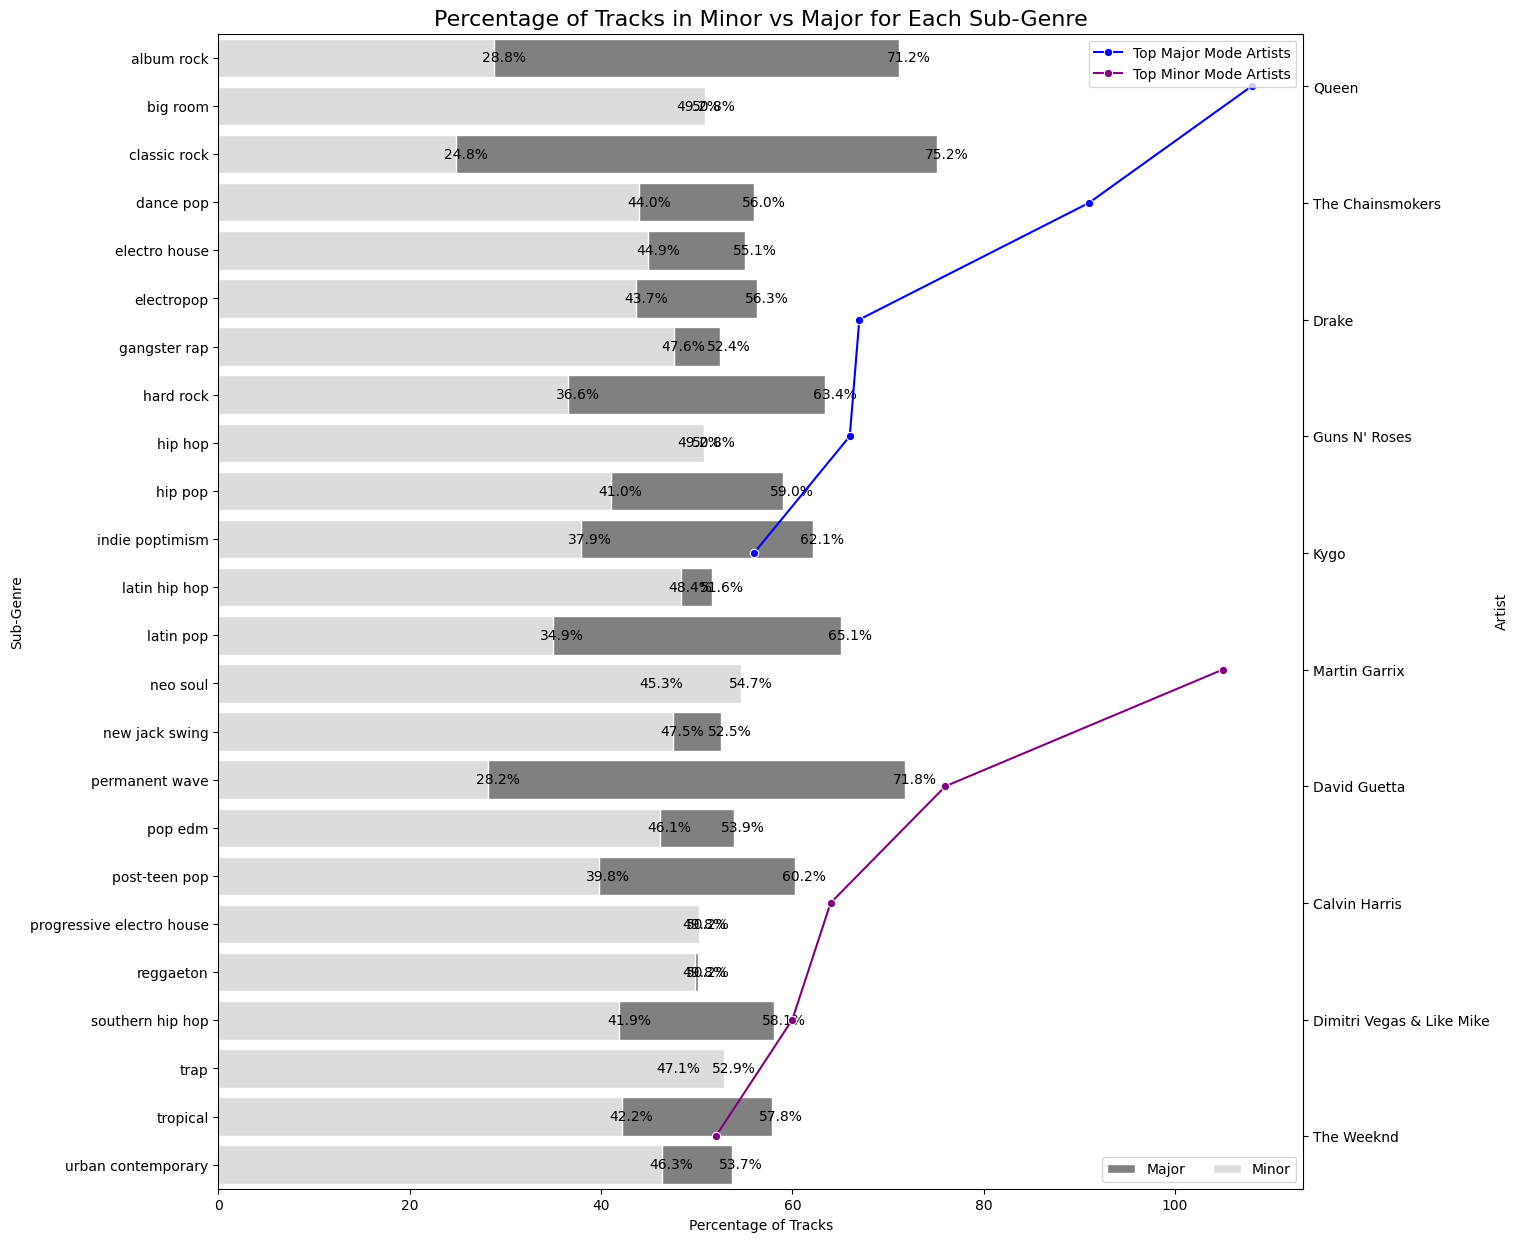

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify_songs.csv')

sub_genre_mode_counts = df.groupby(['playlist_subgenre', 'mode']).size().unstack().fillna(0)
sub_genre_mode_percents = sub_genre_mode_counts.divide(sub_genre_mode_counts.sum(axis=1), axis=0) * 100
sub_genre_mode_percents.rename(columns={0: 'Minor', 1: 'Major'}, inplace=True)
sub_genre_mode_percents.reset_index(inplace=True)

major_artists = df[df['mode'] == 1].groupby('track_artist').size().sort_values(ascending=False).head(5)
minor_artists = df[df['mode'] == 0].groupby('track_artist').size().sort_values(ascending=False).head(5)

f, ax = plt.subplots(figsize=(14, 15))

bar_major = sns.barplot(x='Major', y='playlist_subgenre', data=sub_genre_mode_percents,
                        label="Major", color="grey", edgecolor='w')
bar_minor = sns.barplot(x='Minor', y='playlist_subgenre', data=sub_genre_mode_percents,
                        label="Minor", color="gainsboro", edgecolor='w')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Sub-Genre", xlabel="Percentage of Tracks")
sns.despine(left=True, bottom=True)

for bar in ax.patches:
    width = bar.get_width()
    ax.text(bar.get_x() + width + 1,
            bar.get_y() + bar.get_height()/2.,
            '{0:.1f}%'.format(width),
            ha="center", va="center")

ax.set_title('Percentage of Tracks in Minor vs Major for Each Sub-Genre', fontsize=16)

ax2 = ax.twinx()
sns.lineplot(x=major_artists.values, y=major_artists.index, marker="o", ax=ax2, label='Top Major Mode Artists', color='blue')
sns.lineplot(x=minor_artists.values, y=minor_artists.index, marker="o", ax=ax2, label='Top Minor Mode Artists', color='purple')
ax2.legend(loc="upper right", frameon=True)
ax2.set(ylabel="Artist", xlabel="Number of Tracks")

ax2.set_facecolor('#f5f5f5')
plt.show()